In [2]:
%matplotlib inline

import math

import numpy as np
import scipy as sp
import pandas as pd

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.cross_validation import train_test_split


import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv('../nikhil/initial_data_urban_area.csv')

In [77]:
# list(data.columns.values)

In [6]:
df = data[data['StationCount']>0]
# df = data
print len(df)
# df["rate"] = df["Total"]/df["count"]
# df = df.drop('UANUM', 1).drop('UANAME', 1).drop('UANAME_LONG', 1).drop('PeoplePerStation', 1).drop('StationsPerPerson', 1).drop('State', 1).drop('Geography', 1).drop('Latitude', 1).drop('Longitude', 1)
df = df.dropna()
# list(df.columns.values)

1010


In [15]:
df['Total; Estimate; Population 18 to 24 years'] =df['Total; Estimate; Population 18 to 24 years']/df['Population']
df['Male; Estimate; Population 18 to 24 years'] =df['Male; Estimate; Population 18 to 24 years']/df['Population']
df['Female; Estimate; Population 18 to 24 years'] =df['Female; Estimate; Population 18 to 24 years']/df['Population']
df['Total; Estimate; Population 25 years and over'] =df['Total; Estimate; Population 25 years and over']/df['Population']
df['Male; Estimate; Population 25 years and over'] =df['Male; Estimate; Population 25 years and over']/df['Population']
df['Female; Estimate; Population 25 years and over'] =df['Female; Estimate; Population 25 years and over']/df['Population']
df['Total; Estimate; Population 25 to 34 years'] =df['Total; Estimate; Population 25 to 34 years']/df['Population']
df['Male; Estimate; Population 25 to 34 years'] =df['Male; Estimate; Population 25 to 34 years']/df['Population']
df['Female; Estimate; Population 25 to 34 years'] =df['Female; Estimate; Population 25 to 34 years']/df['Population']
df['Total; Estimate; Population 35 to 44 years'] =df['Total; Estimate; Population 35 to 44 years']/df['Population']
df['Male; Estimate; Population 35 to 44 years'] =df['Male; Estimate; Population 35 to 44 years']/df['Population']
df['Female; Estimate; Population 35 to 44 years'] =df['Female; Estimate; Population 35 to 44 years']/df['Population']
df['Total; Estimate; Population 45 to 64 years'] =df['Total; Estimate; Population 45 to 64 years']/df['Population']
df['Male; Estimate; Population 45 to 64 years'] =df['Male; Estimate; Population 45 to 64 years']/df['Population']
df['Female; Estimate; Population 45 to 64 years'] =df['Female; Estimate; Population 45 to 64 years']/df['Population']
df['Total; Estimate; Population 65 years and over'] =df['Total; Estimate; Population 65 years and over']/df['Population']
df['Male; Estimate; Population 65 years and over'] =df['Male; Estimate; Population 65 years and over']/df['Population']
df['Female; Estimate; Population 65 years and over'] =df['Female; Estimate; Population 65 years and over']/df['Population']
df['graduate_25+'] =df['graduate_25+']/df['Population']
df = df.drop('Population', 1)

In [25]:
df = df.iloc[np.random.permutation(len(df))]
df.reset_index(drop=True)
# df
# print ""
df.iloc[0]

StationCount                                                                        5.000000e+00
IncentivesCount                                                                     2.000000e+00
percent_own                                                                         6.321343e+01
Household Income Less than $10,000                                                  1.424400e+04
Household Income $10,000 to $14,999                                                 9.144000e+03
Household Income $15,000 to $19,999                                                 8.983000e+03
Household Income $20,000 to $24,999                                                 7.793000e+03
Household Income $25,000 to $29,999                                                 7.279000e+03
Household Income $30,000 to $34,999                                                 7.170000e+03
Household Income $35,000 to $39,999                                                 5.752000e+03
Household Income $40,000 to $4

In [17]:
ndata = df.values
ndata = np.hsplit(ndata, np.array([1]))
Y = ndata[0]
X = ndata[1]




In [18]:
train_X, dev_X, train_Y, dev_Y = train_test_split(X, Y, test_size=0.25, random_state=42)
print train_X.shape, train_Y.shape
print dev_X.shape, dev_Y.shape
# print train_X
# print train_Y

(753, 61) (753, 1)
(251, 61) (251, 1)


In [19]:
def try_reggressor(regressor) :

#     print train_X.shape, train_Y.shape
#     print dev_X.shape, dev_Y.shape

    regressor.fit(train_X, train_Y)
    dev_predictions = regressor.predict(dev_X)

    plt.plot(dev_Y, dev_predictions, 'r.')
    plt.show()

    _explained_variance_score = explained_variance_score(dev_Y, dev_predictions)
    _mean_absolute_error = mean_absolute_error(dev_Y, dev_predictions)
    _mean_squared_error = mean_squared_error(dev_Y, dev_predictions)
    _r2_score = r2_score(dev_Y, dev_predictions)
    print _explained_variance_score, _mean_absolute_error, _mean_squared_error, _r2_score


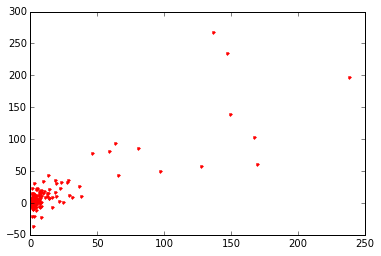

0.66608519907 8.06199857412 276.578288368 0.666032541232


In [20]:
try_reggressor(LinearRegression())

/opt/anaconda/envs/capstone/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


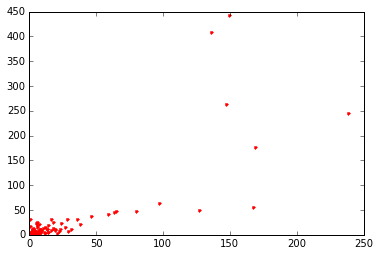

0.0311944784913 6.6390438247 806.91625498 0.0256510274007
[  2.30951706e-03   1.39923099e-02   2.34924262e-04   1.72029644e-03
   1.65800376e-04   2.85898510e-04   9.70910904e-04   5.31831173e-04
   9.01262342e-05   4.05686182e-04   5.06486810e-04   6.17841349e-04
   8.03659204e-02   1.65788381e-03   1.67622124e-03   2.43460788e-01
   3.23330354e-01   1.73351574e-01   1.21239559e-05   1.47381608e-05
   1.03818994e-05   3.61436094e-04   1.83255984e-03   1.85967117e-02
   8.77624666e-05   9.40931075e-05   2.37932448e-05   1.92128857e-02
   8.56755971e-03   6.17441781e-04   1.98685920e-02   8.44641839e-03
   9.73813821e-03   4.67732454e-05   8.89739134e-05   2.86265639e-04
   9.08773753e-06   2.02274696e-05   1.89169334e-05   7.40628937e-04
   5.44455901e-04   6.75606718e-04   1.64139563e-05   3.97556248e-06
   1.95683103e-06   5.69190265e-04   1.31926819e-02   7.78769551e-04
   1.29691470e-05   4.04982519e-05   4.95317033e-05   1.70399244e-02
   1.70455382e-02   6.95774139e-04   1.913071

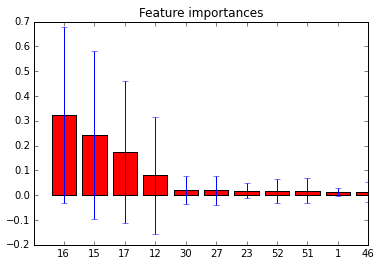

In [24]:
forest = RandomForestRegressor()
try_reggressor(forest)
print forest.feature_importances_

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

cols = train_X.shape[1]
for f in range(cols):
    print("%d. (%f) %s " % (f + 1, importances[indices[f]], df.columns[indices[f]+1]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(cols), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(cols), indices)
plt.xlim([-1, 10])
plt.show()

/opt/anaconda/envs/capstone/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


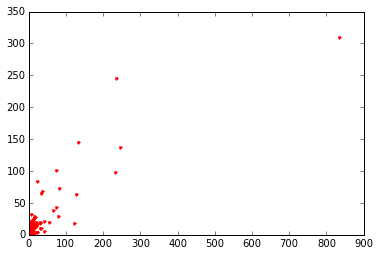

0.62846694842 8.34416666667 1417.03525 0.626105410455


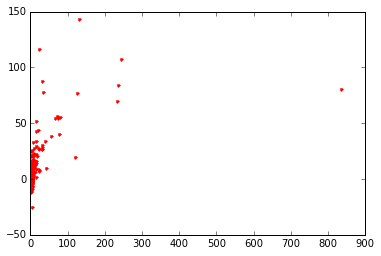

0.253009028797 12.803314675 2846.77199019 0.248859444532


In [74]:
try_reggressor(RandomForestRegressor())
try_reggressor(LinearRegression())